In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd
import seaborn as sns

from torch.autograd import Variable
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
def generate_data(N, dim=32, attention_col=1):
    x = np.random.standard_normal(size=(N, dim))
    y = np.random.randint(low=0, high=3, size=(N, 1))
    x[:, attention_col] = y[:, 0]
    return x, y

In [81]:
class Net(nn.Module):
    def __init__(self, ndim=32):
        super(Net, self).__init__()
        self.attention = nn.Linear(ndim, ndim)
        self.out = nn.Linear(ndim, 1)
    
    def attn(self, x):
        p = F.softmax(self.attention(x))
        return p
        
    def forward(self, x):
        x = x*self.attn(x)
        x = self.out(x)
        return x

In [82]:
model = Net(ndim=64)

In [83]:
X, y = generate_data(1000, dim=64, attention_col=0)

In [84]:
X.shape, y.shape

((1000, 64), (1000, 1))

In [85]:
print X[43], y[43]

[ 2.         -2.09068456  0.11405453  0.64154966 -0.29817492 -0.66964515
  0.30032585 -0.08318153  0.5987997   0.21352732 -0.08490699  0.82666886
  0.45163526  0.31494914 -0.82337824  0.03937721  0.19410172  0.44327565
 -0.73044892 -0.17182248  0.85929378  0.62068901  0.18488756 -0.61636381
 -2.39086977  0.44363445  1.91554619  1.63624793 -1.61618411 -0.07535278
  0.91866015 -0.16102365  1.14327666  1.92975856 -0.93425161  1.74193746
 -0.02677865  0.97725912 -1.13682043  0.469596   -0.27217319  1.46526663
  1.11104787  1.85219651  0.74160856 -0.94769899 -0.51018172 -0.0816833
 -1.06458725 -1.65021962 -0.95537009  0.01807211 -1.75735026  1.57079269
 -0.73843006  1.76407329  0.88343291 -1.08873464  1.61252319 -0.3823255
 -0.50242332  1.04845229 -0.27469207 -0.93618533] [2]


In [86]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
lossfn = torch.nn.MSELoss()

In [87]:
for epoch in range(4000):
    pred = model(torch.FloatTensor(X))
    
    loss = lossfn(pred, torch.FloatTensor(y))
    optimizer.zero_grad()
    
    loss.backward()
    optimizer.step()
    
    if epoch % 200 == 0:
        print epoch, loss

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:8: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


0 tensor(1.4288)
200 tensor(0.6313)
400 tensor(0.1872)
600 tensor(1.00000e-02 *
       7.2568)
800 tensor(1.00000e-02 *
       4.0132)
1000 tensor(1.00000e-02 *
       2.7296)
1200 tensor(1.00000e-02 *
       2.0877)
1400 tensor(1.00000e-02 *
       1.6522)
1600 tensor(1.00000e-02 *
       1.3191)
1800 tensor(1.00000e-02 *
       1.1291)
2000 tensor(1.00000e-03 *
       8.8215)
2200 tensor(1.00000e-03 *
       7.7838)
2400 tensor(1.00000e-03 *
       6.6559)
2600 tensor(1.00000e-03 *
       5.3631)
2800 tensor(1.00000e-03 *
       4.5698)
3000 tensor(1.00000e-03 *
       4.0180)
3200 tensor(1.00000e-03 *
       3.3260)
3400 tensor(1.00000e-03 *
       2.4587)
3600 tensor(1.00000e-03 *
       2.1648)
3800 tensor(1.00000e-03 *
       1.9523)


In [88]:
o = model(torch.FloatTensor(X))
print o.shape

torch.Size([1000, 1])


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:8: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


In [89]:
a = model.attn(torch.FloatTensor(X))
print a.shape

torch.Size([1000, 64])


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:8: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


In [90]:
k = a.data.numpy().mean(0)

In [91]:
import pandas as pd

In [92]:
print k

[0.15669705 0.01621643 0.00042645 0.01335718 0.00976718 0.02143238
 0.01771743 0.00994703 0.01203639 0.00953755 0.00042049 0.00047671
 0.01895436 0.00991868 0.01648286 0.0230508  0.00045058 0.00938775
 0.01317345 0.02160912 0.00763146 0.00873558 0.02888333 0.01393789
 0.01756506 0.01192493 0.02057106 0.01543912 0.01591057 0.0114369
 0.01439213 0.01373999 0.01299743 0.00684363 0.022208   0.02002126
 0.01304025 0.01701249 0.01414059 0.01209748 0.01779367 0.01030369
 0.01256987 0.00034324 0.02095759 0.0161114  0.00971937 0.01593683
 0.01218164 0.02438933 0.00037978 0.01866604 0.02074818 0.02309609
 0.00046371 0.02447929 0.01923825 0.01969794 0.00689671 0.01146185
 0.00059324 0.00987342 0.00972839 0.01478114]


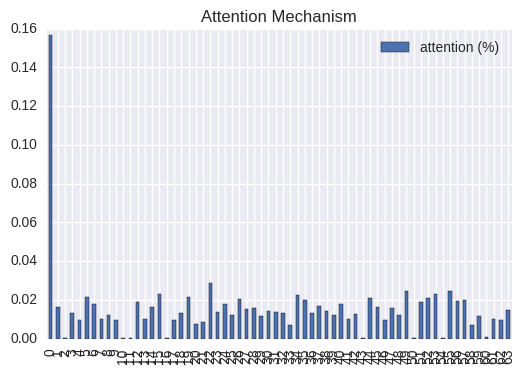

In [93]:
N = 0
ds = pd.DataFrame(k, columns=['attention (%)'])
ds.plot(kind='bar', title='Attention Mechanism')
plt.show()